<a href="https://colab.research.google.com/github/angelinakhatiwada/Urban-Sound-Classification/blob/main/Urban_Sound_Classification_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Urban Sound Classification

## Part 1: Dataset import and feature extraction

**Project for Machine Learning Course**

*Angelina Khatiwada*, 

*MSc, Data Science and Economics*

Dec 2021



In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import librosa
import librosa.display

from tensorflow.keras.utils import to_categorical 

In [2]:
# installing Kaggle library
# please upload your kaggle.json file with Kaggle API credentials manually to the files folder
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
#dataset link: https://www.kaggle.com/chrisfilo/urbansound8k
!  kaggle datasets download chrisfilo/urbansound8k

100% 5.61G/5.61G [01:53<00:00, 19.0MB/s]
100% 5.61G/5.61G [01:53<00:00, 53.1MB/s]


In [2]:
#! unzip urbansound8k.zip

In [14]:
metadata = pd.read_csv("UrbanSound8K.csv")
print(metadata.shape)
metadata.head(15)

(8732, 8)


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


### Exploratory analysis

In [ ]:
# no missing values in the metadata file
metadata.isnull().values.any()

False

In [ ]:
# check if there are duplicate values in the metadata file
metadata.duplicated(subset=['slice_file_name']).any()

False

[Text(0, 0, 'dog_bark'),
 Text(0, 0, 'children_playing'),
 Text(0, 0, 'car_horn'),
 Text(0, 0, 'air_conditioner'),
 Text(0, 0, 'street_music'),
 Text(0, 0, 'gun_shot'),
 Text(0, 0, 'siren'),
 Text(0, 0, 'engine_idling'),
 Text(0, 0, 'jackhammer'),
 Text(0, 0, 'drilling')]

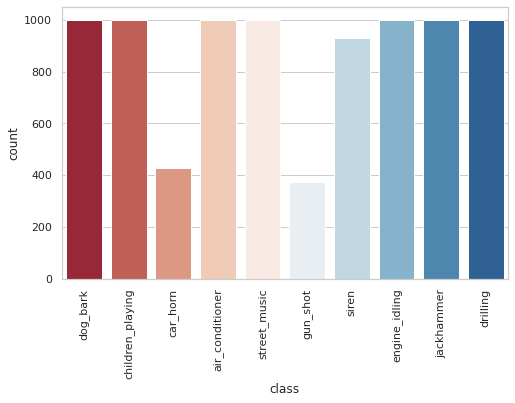

In [ ]:
# check if the dataset is balanced

plt.figure(figsize = (8,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="class", data=metadata, palette="RdBu")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
# examples from each class
examples = ['100032-3-0-0.wav',
 '100263-2-0-117.wav',
 '100648-1-0-0.wav',
 '100852-0-0-0.wav',
 '101848-9-0-0.wav',
 '102305-6-0-0.wav',
 '102853-8-0-0.wav',
 '102857-5-0-0.wav',
 '103074-7-0-0.wav',
 '103199-4-0-0.wav']

In [ ]:
# creating examples dataset
examples_df = metadata[metadata['slice_file_name'].isin(examples)]
examples_df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn
22,100852-0-0-0.wav,100852,0.000000,4.000000,1,5,0,air_conditioner
94,101848-9-0-0.wav,101848,0.000000,4.000000,1,7,9,street_music
106,102305-6-0-0.wav,102305,0.000000,2.611610,1,1,6,gun_shot
114,102853-8-0-0.wav,102853,0.000000,4.000000,2,7,8,siren
122,102857-5-0-0.wav,102857,0.000000,4.000000,1,10,5,engine_idling
171,103074-7-0-0.wav,103074,3.341279,7.341279,1,1,7,jackhammer
196,103199-4-0-0.wav,103199,0.000000,4.000000,1,3,4,drilling


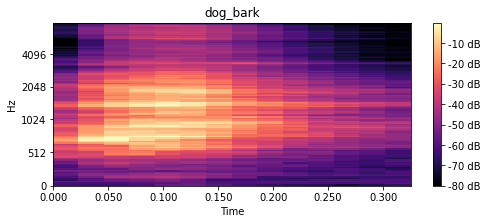

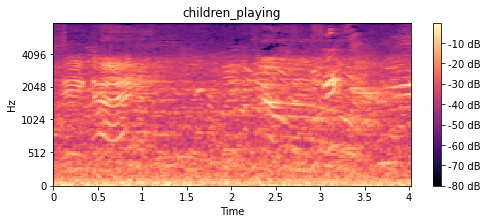

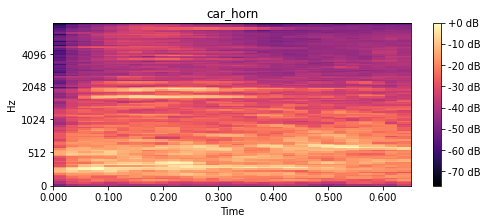

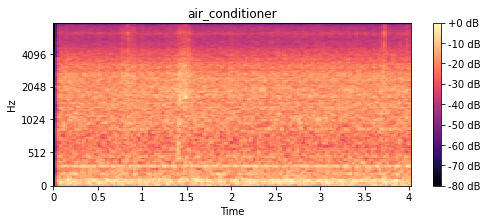

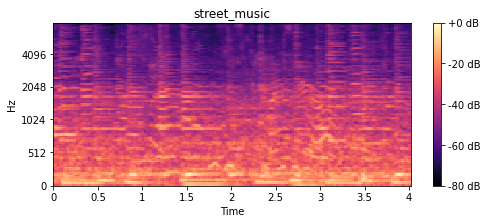

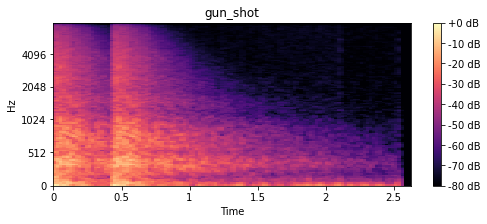

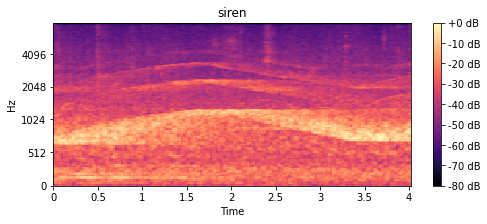

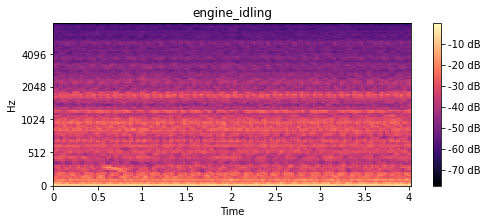

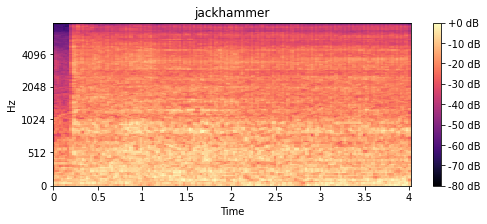

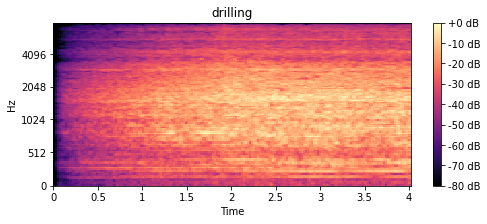

In [ ]:
# exploring differences in frequencies for all the classes using melspectrogram
list_sound_files, list_sampling_rates = [], []
indices = examples_df.index.values.tolist()  

for i in indices:

  # extracting sound_file for 10 examples
  dir = 'fold' +str(examples_df['fold'][i]) +'/' + examples_df['slice_file_name'][i]
  sound_file, sampling_rate = librosa.load(dir)

  #plotting frequences
  S = librosa.feature.melspectrogram(y=sound_file, sr=sampling_rate)
  #D = librosa.amplitude_to_db(np.abs(librosa.stft(sound_file)), ref=np.max)

  fig, ax = plt.subplots(figsize=(8,3))
  S_dB = librosa.power_to_db(S, ref=np.max)
  
  #librosa.display.specshow(D, y_axis='linear')
  img = librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=sampling_rate,
                          fmax=8000, ax=ax)
  
  fig.colorbar(img, ax=ax, format='%+2.0f dB')
  ax.set(title=(examples_df['class'][i]))      

## Feature extraction

### Example sound file: children playing

In [49]:
# example 
sound_file, sampling_rate = librosa.load("fold5/100263-2-0-117.wav", sr = None)

mfccs = librosa.feature.mfcc(sound_file, sampling_rate)
melspectrogram =librosa.feature.melspectrogram(sound_file, sampling_rate)
chroma_stft=librosa.feature.chroma_stft(sound_file, sampling_rate,)

mfccs.shape, melspectrogram.shape, chroma_stft.shape

((20, 345), (128, 345), (12, 345))

In [50]:
print(sound_file.shape)
print(sampling_rate)

(176400,)
44100


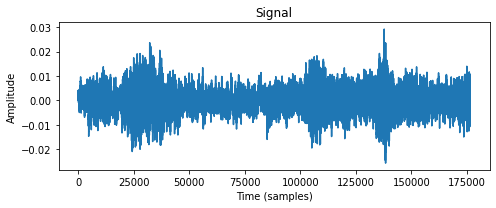

In [51]:
plt.figure(figsize=(7,3))
plt.plot(sound_file);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude')
plt.tight_layout()

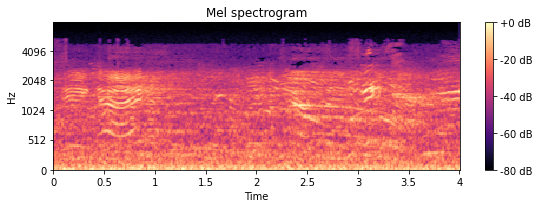

In [52]:
#Melspectrogram of children playing
plt.figure(figsize=(8,3))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),
                         y_axis='mel',sr=sampling_rate,
                         fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

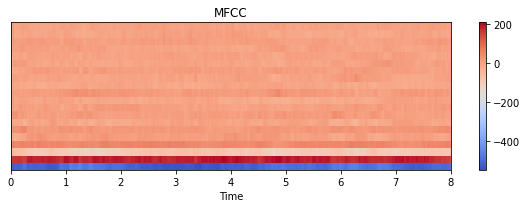

In [53]:
#MFCC of children playing
plt.figure(figsize=(8,3))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

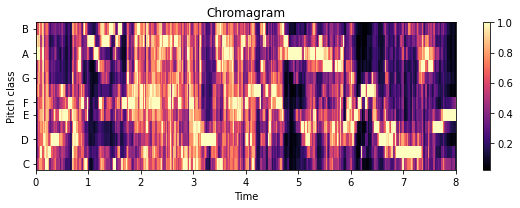

In [54]:
#Chromagram of of children playing
plt.figure(figsize=(8,3))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [27]:
#extracting mels features
def extract_feature_mels(file):
  sound_file, sampling_rate = librosa.load(file, sr = None, res_type='kaiser_fast')

  melspectrogram =librosa.feature.melspectrogram(sound_file, sampling_rate)
  
  mels_mean = np.mean(melspectrogram.T,axis=0)
  mels_mean, mels_std, mels_min, mels_max = np.mean(melspectrogram.T,axis=0),np.std(melspectrogram.T,axis=0), np.min(melspectrogram.T,axis=0), np.max(melspectrogram.T,axis=0)
  mels_feature = np.hstack([mels_mean, mels_std, mels_min, mels_max])

  return  mels_feature

In [56]:
#extracting mfcc, mels and chroma features
def extract_feature(file):
  sound_file, sampling_rate = librosa.load(file, res_type='kaiser_fast', sr = None)

  mfccs = librosa.feature.mfcc(sound_file, sampling_rate, n_mfcc=40)
  melspectrogram =librosa.feature.melspectrogram(sound_file, sampling_rate, n_mels=40)
  chroma_stft=librosa.feature.chroma_stft(sound_file, sampling_rate, n_chroma =40)

  mfccs_mean, mfcc_std, mfcc_min, mfcc_max = np.mean(mfccs.T,axis=0),np.std(mfccs.T,axis=0), np.min(mfccs.T,axis=0), np.max(mfccs.T,axis=0)
  mfcc_feature = np.hstack([mfccs_mean, mfcc_std, mfcc_min , mfcc_max])

  mels_mean, mels_std, mels_min, mels_max = np.mean(melspectrogram.T,axis=0),np.std(melspectrogram.T,axis=0), np.min(melspectrogram.T,axis=0), np.max(melspectrogram.T,axis=0)
  mels_feature = np.hstack([mels_mean, mels_std, mels_min, mels_max])

  chroma_mean, chroma_std, chroma_min, chroma_max = np.mean(chroma_stft.T,axis=0),np.std(chroma_stft.T,axis=0), np.min(chroma_stft.T,axis=0), np.max(chroma_stft.T,axis=0)
  chroma_feature = np.hstack([chroma_mean, chroma_std, chroma_min, chroma_max])

  return mfcc_feature, mels_feature, chroma_feature

In [28]:
mels_feature = extract_feature_mels("fold2/100652-3-0-0.wav")
mels_feature.shape

(512,)

In [42]:
mfcc_feature, mels_feature, chroma_feature = extract_feature("fold5/100263-2-0-117.wav")
mfcc_feature.shape, mels_feature.shape, chroma_feature.shape
#print(160+160+160)

((160,), (160,), (160,))

In [ ]:
#stacking and reshaping
features = np.empty((0,480))
ext_features = np.hstack([mfcc_feature, mels_feature, chroma_feature])
features = np.vstack([features,ext_features])
features.shape

### Feature extraction: entire dataset

#### Melspectrogram 128 x 4

In [31]:
import time 
from tqdm import tqdm
path="fold"
exception_count = 0
data_mels = []

for i in tqdm(range(len(metadata))):

    fold_no=str(metadata.iloc[i]["fold"])

    file=metadata.iloc[i]["slice_file_name"]
    label=metadata.iloc[i]["classID"]
    filename=path+fold_no+"/"+file

    try:
        mels_feature = extract_feature_mels(filename)
              
    except: # else exception (.ds_store files are part of mac file systems)
        print(filename)
        exception_count += 1
        continue
                  
    data_mels.append([mels_feature, mels_feature.shape, label, fold_no, file])
    
  
print("Exceptions: ", exception_count)

 33%|███▎      | 2848/8732 [01:41<03:07, 31.31it/s]/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "
100%|██████████| 8732/8732 [05:08<00:00, 28.29it/s]

Exceptions:  0


In [32]:
cols=["features", "shape","label", "fold", 'file_name']
data_df_mels = pd.DataFrame(data = data_mels, columns=cols)
data_df_mels.head(10)

,features,shape,label,fold,file_name
0,"[6.7016525e-05, 0.0002738931, 0.00043046506, 0...","(512,)",3,5,100032-3-0-0.wav
1,"[0.046293005, 0.046115912, 0.031325452, 0.0162...","(512,)",2,5,100263-2-0-117.wav
2,"[0.028046967, 0.03285183, 0.030295085, 0.01307...","(512,)",2,5,100263-2-0-121.wav
3,"[0.025350068, 0.04161336, 0.037191, 0.04856568...","(512,)",2,5,100263-2-0-126.wav
4,"[0.05126126, 0.035394225, 0.01814437, 0.013484...","(512,)",2,5,100263-2-0-137.wav
5,"[0.054035142, 0.15631363, 0.10443847, 0.026308...","(512,)",2,5,100263-2-0-143.wav
6,"[0.042379502, 0.044902083, 0.0235799, 0.015929...","(512,)",2,5,100263-2-0-161.wav
7,"[0.030354952, 0.07766642, 0.046720356, 0.01970...","(512,)",2,5,100263-2-0-3.wav
8,"[0.03935969, 0.102540016, 0.049632195, 0.02398...","(512,)",2,5,100263-2-0-36.wav
9,"[0.0015458412, 0.009754352, 0.050384488, 0.177...","(512,)",1,10,100648-1-0-0.wav


In [34]:
import pickle
pickle.dump(data_df_mels, open('features_mels_512.p','wb'))

#### Melspectrogram, MFCCs, Chromagram 40 x 4 x 3

In [57]:
import time 
from tqdm import tqdm
path="fold"
exception_count = 0
data = []

for i in tqdm(range(len(metadata))):

    fold_no=str(metadata.iloc[i]["fold"])

    file=metadata.iloc[i]["slice_file_name"]
    label=metadata.iloc[i]["classID"]
    filename=path+fold_no+"/"+file

    try:
        mfcc_feature, mels_feature, chroma_feature = extract_feature(filename)
        features = np.empty((0,480))
        ext_features = np.hstack([mfcc_feature, mels_feature, chroma_feature])
        features = np.vstack([features,ext_features])
            
    except: # else exception (.ds_store files are part of mac file systems)
        print(filename)
        exception_count += 1
        continue
                  
    data.append([features, features.shape, label, fold_no, file])
    
  
print("Exceptions: ", exception_count)

  1%|▏         | 122/8732 [00:13<25:20,  5.66it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
 33%|███▎      | 2850/8732 [05:07<07:42, 12.72it/s]/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "
100%|██████████| 8732/8732 [15:32<00:00,  9.36it/s]

Exceptions:  0


In [58]:
cols=["features", "shape","label", "fold", 'file_name']
data_df = pd.DataFrame(data = data, columns=cols)
data_df.head(1)

,features,shape,label,fold,file_name
0,"[[-275.1181945800781, 119.9420166015625, -98.5...","(1, 480)",3,5,100032-3-0-0.wav


In [59]:
ll = [data_df['features'][i].ravel() for i in range(data_df.shape[0])]
data_df['sample'] = pd.Series(ll, index=data_df.index)
del data_df['features']

In [60]:
data_df.head()

,shape,label,fold,file_name,sample
0,"(1, 480)",3,5,100032-3-0-0.wav,"[-275.1181945800781, 119.9420166015625, -98.53..."
1,"(1, 480)",2,5,100263-2-0-117.wav,"[-500.94219970703125, 185.2790985107422, -86.7..."
2,"(1, 480)",2,5,100263-2-0-121.wav,"[-531.3129272460938, 187.2084197998047, -70.58..."
3,"(1, 480)",2,5,100263-2-0-126.wav,"[-476.6883544921875, 160.30865478515625, -62.9..."
4,"(1, 480)",2,5,100263-2-0-137.wav,"[-521.3388671875, 185.5974578857422, -82.17254..."


In [61]:
data_df['sample'][0].shape

(480,)

In [63]:
import pickle
pickle.dump(data_df, open('features_mfcc_mels_chroma_480.p','wb'))